Deskriptiv sammanfattning av AdventureWorks2022-databasen:
        TABLE_CATALOG TABLE_SCHEMA     TABLE_NAME  TABLE_TYPE
0  AdventureWorks2022          dbo  EmployeeTable  BASE TABLE
Resultat av SQL-frågan:
                       JobTitle  NumberOfEmployees
0                         Buyer                  1
1          Marketing Specialist                  1
2  Production Technician - WC45                  1
3  Quality Assurance Technician                  1
4          Sales Representative                  1
5          Scheduling Assistant                  1


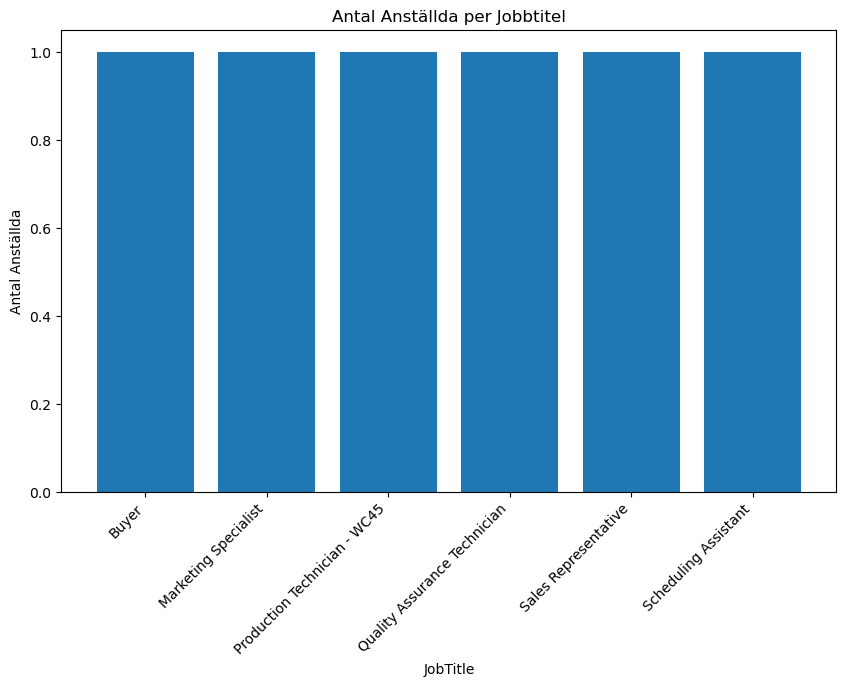

Medelantalet anställda: 1.0
Standardavvikelse av antal anställda: 0.0
Konfidensintervall för antalet anställda: (1.0, 1.0)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Database connection parameters
server_name = 'GEORGE'
database_name = 'AdventureWorks2022'
username = 'georg'


# sähar Skapa man anslutningssträngen till server och koppla allt tillsmans men om vi har lösenord måste vara åckso med
db_url = f"mssql+pyodbc://{username}@{server_name}/{database_name}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server"

# Skapa SQLAlchemy
engine = create_engine(db_url)

# för att visa deskriptiv sammanfattning på SQL-fråga 
query_summary = """
SELECT *
FROM INFORMATION_SCHEMA.TABLES;
"""

# Exekvera frågan och läs in resultatet i en Pandas DataFrame
df_summary = pd.read_sql(query_summary, engine)

# Visa den deskriptiva sammanfattningen av databasen
print("en deskriptiv sammanfattning över databasen AdventureWorks2022:")
print(df_summary)

# SQL-kod för att få den efterfrågade stapeldiagramdatan
query_results = """
SELECT JobTitle, COUNT(*) as NumberOfEmployees
FROM EmployeeTable 
GROUP BY JobTitle
ORDER BY NumberOfEmployees DESC;
"""

# Exekvera frågan och läs in resultatet i en Pandas DataFrame
df_results = pd.read_sql(query_results, engine)

# Visa resultaten från df results
print("Resultat av SQL-frågan:")
print(df_results)

# Visualisera data med ett stapeldiagram
plt.figure(figsize=(10, 6))
plt.bar(df_results['JobTitle'], df_results['NumberOfEmployees'])
plt.xlabel('JobTitle')
plt.ylabel('Antal Anställda')
plt.title('Antal Anställda per Jobbtitel')
plt.xticks(rotation=45, ha='right')
plt.show()

# Statistisk analys och konfidensintervall (exempel)
mean_employees = df_results['NumberOfEmployees'].mean()
std_dev_employees = df_results['NumberOfEmployees'].std()

confidence_interval = (mean_employees - 1.96 * std_dev_employees, mean_employees + 1.96 * std_dev_employees)

print(f"Medelantalet anställda: {mean_employees}")
print(f"Standardavvikelse av antal anställda: {std_dev_employees}")
print(f"Konfidensintervall för antalet anställda: {confidence_interval}")




